### Q1: What is Estimation Statistics? Explain point estimate and interval estimate.

Estimation:

> Estimation in statistics are any procedures used to calculate the value of a population drawn from observations within a sample size drawn from that population. There are two types of estimation: either point or interval estimation.


* A point estimate is a single value estimate of a parameter. For instance, a sample mean is a point estimate of a population mean.
* An interval estimate gives you a range of values where the parameter is expected to lie. A confidence interval is the most common type of interval estimate.


### Q2. Write a Python function to estimate the population mean using a sample mean and standard deviation.



In [6]:
# we are going assume sample size is going to be >= 30 ----> we can use the z-test
# we are taking the confidence level of 95%
# we are going to take point estimate of population standard deviation as sample standard deviation while calculating 
# the standard error(SE) as population standard deviation is not known. 

import scipy.stats as st
import math


sample_size = int(input("Please enter sameple size greater than 30: "))
sample_mean = float(input("Please enter the Sample Mean: "))
sample_standard_deviation = float(input("Please enter the Sample Standard Deviation: "))
                  
CL = 0.95  #CL --> Confidence Level

def calculate_population_mean(sample_mean, sample_standard_deviation, sample_size, CL):
    
    # Read "https://stackoverflow.com/questions/60699836/how-to-use-norm-ppf" to understand the below.

    alpha = 1 - CL
    half_alpha = alpha/2  # considering two-tail distribution
    z_score = st.norm.ppf(1-half_alpha)
    
    # when population standard deviattion are unknown, we take point estimate of sample standard deviation as population
    # standard deviation in the formula to calculate standard error
    
    standard_error = sample_standard_deviation/math.sqrt(sample_size)
    print("Standard Error:", standard_error)
    population_mean_min = sample_mean - (z_score*standard_error)
    population_mean_max = sample_mean + (z_score*standard_error)
    print("Population mean will fall under {} to {} with confidence level of {}%".format(population_mean_min, population_mean_max, CL*100))


calculate_population_mean(sample_mean, sample_standard_deviation, sample_size, CL)


# to understand calculation concept, visit: http://www.southampton.ac.uk/~cpd/mean2.html

Please enter sameple size greater than 30:  25
Please enter the Sample Mean:  526.1
Please enter the Sample Standard Deviation:  113.7


Standard Error: 22.740000000000002
Population mean will fall under 481.5304189915592 to 570.6695810084409 with confidence level of 95.0%


### Q3: What is Hypothesis testing? Why is it used? State the importance of Hypothesis testing.

Hypothesis testing is a formal procedure for investigating our ideas about the world using statistics. 

There are 5 main steps in hypothesis testing:

* State your research hypothesis as a null hypothesis and alternate hypothesis (Ho) and (Ha or H1).
* Collect data in a way designed to test the hypothesis.
* Perform an appropriate statistical test.
* Decide whether to reject or fail to reject your null hypothesis.
* Present the findings in your results and discussion section.

Why it is used?

> It is most often used by scientists to test specific predictions, called hypotheses, that arise from theories.

Importance of Hypothesis Testing:

> it is how you decide if something really happened, or if certain treatments have positive effects, or if groups differ from each other or if one variable predicts another. In short, you want to proof if your data is statistically significant and unlikely to have occurred by chance alone. In essence then, a hypothesis test is a test of significance.

### Q4. Create a hypothesis that states whether the average weight of male college students is greater than the average weight of female college students.


* <b>Null Hypothesis(H<sub>0</sub>)</b>: Average weight of Male College students and Female college students are same.
* <b>Alternate Hypothesis(H<sub>a</sub>)</b>: Average weight of Male College students is greater than average weight of Female college students.

### Q5. Write a Python script to conduct a hypothesis test on the difference between two population means, given a sample from each population.


In [1]:
'''
The below example used in the code:
Two groups of students are given different study materials to prepare for a test. The first group (n1 = 30) has a mean score
of 80 with a standard deviation of 10, and the second group (n2 = 40) has a mean score of 75 with a standard deviation of 8.
Test the hypothesis that the population means for the two groups are equal with a significance level of 0.01.

'''

'''

from above example:

<pre>

s1 = 10   s2 = 8
n1 = 30   n2 = 40
x1 = 80   x2 = 75

α = 0.01(significance level)  ---> confidence level = 1 - α = 0.99 --- 99%

α/2 = 0.005

* H<sub>0</sub>: μ1 = μ2  --> μ1 - μ2 = 0 (Null Hypothesis)
* H<sub>a</sub>: μ1 ≠ μ2  --> μ1 - μ2 ≠ 0 (Alternate Hypothesis)

</pre>

'''

import scipy.stats as st
import math

# s1, s2 --> standard deviations
# n1, n2 --> sample sizes
# x1, x2 --> sample means

s1 = 10   
s2 = 8
n1 = 30   
n2 = 40
x1 = 80   
x2 = 75
α = 0.01


def z_test_hypothesis(s1,s2,n1,n2,x1,x2,α):
    
    # Read "https://stackoverflow.com/questions/60699836/how-to-use-norm-ppf" to understand the below.

    # considering two-tail distribution as estimating population mean is a range between min and max, we will use α/2 in func
    critical_z_value = st.norm.ppf(1-α/2)
    print("Critical z Value: ", critical_z_value)
    
    # when population standard deviattion are unknown, we take point estimate of sample standard deviation as population
    # standard deviation in the formula to calculate standard error(SE)
    
    mean_diff = x1 - x2
    mu_diff = 0 # as per null hypothesis, there is no difference in population mean 
    se1 = s1/math.sqrt(n1) # standard error for sample 1
    print("SE1: ", se1)
    se2 = s2/math.sqrt(n2) # standard error for sample 2
    print("SE2: ", se2)
    sed = math.𝑠𝑞𝑟𝑡(se1*2+se2*2) # standard error difference between two samples
    print("SED: ", sed)
    
    z_statistics = (mean_diff - mu_diff)/sed
    print("Z Statistics: ", z_statistics)
    
    if z_statistics<0:
        if critical_z_value>z_statistics:
            print("We accept the Null Hypothesis that they is no difference between the population mean")
        else:
            print("We accept the Null Hypothesis that they is no difference between the population mean")
    else:
        if critical_z_value<z_statistics:
            print("We accept the Null Hypothesis that they is no difference between the population mean")
        else:
            print("We accept the Null Hypothesis that they is no difference between the population mean") 
    

z_test_hypothesis(s1,s2,n1,n2,x1,x2,α)


Critical z Value:  2.5758293035489004
SE1:  1.8257418583505538
SE2:  1.2649110640673518
SED:  2.486223208972962
Z Statistics:  2.011082505365823
We accept the Null Hypothesis that they is no difference between the population mean


### Q6: What is a null and alternative hypothesis? Give some examples.

The null and alternative hypotheses are two competing claims that researchers weigh evidence for and against using a statistical test:

* <b>Null Hypothesis(H<sub>0</sub>)</b>: There’s no effect in the population. If the sample provides enough evidence against the claim that there’s no effect in the population (p ≤ α), then we can reject the null hypothesis. Otherwise, we fail to reject the null hypothesis.
* <b>Alternate Hypothesis(H<sub>a</sub>)</b>: There’s an effect in the population.

<table>
    <tr>
        <th>Research Question</th>
        <th>Null Hypothesis Example</th>
        <th>Alternate Hypothesis Example</th>
    </tr>
    <tr>
        <td>Does the amount of text highlighted in the textbook affect exam scores?</td>
        <td>The amount of text highlighted in the textbook has no effect on exam scores.</td>
        <td>The amount of text highlighted in the textbook has an effect on exam scores.</td>
    </tr>
</table>

### Q7: Write down the steps involved in hypothesis testing.

There are 5 main steps in hypothesis testing:

* State your research hypothesis as a null hypothesis and alternate hypothesis (Ho) and (Ha or H1).
* Collect data in a way designed to test the hypothesis.
* Perform an appropriate statistical test.
* Decide whether to reject or fail to reject your null hypothesis.
* Present the findings in your results and discussion section.


### Q8. Define p-value and explain its significance in hypothesis testing.

Definition:
> The p value, or probability value, tells you how likely it is that your data could have occurred under the null hypothesis. It does this by calculating the likelihood of your test statistic, which is the number calculated by a statistical test using your data.

Significance:

* P values are used in hypothesis testing to help decide whether to reject the null hypothesis. The smaller the p value, the more likely you are to reject the null hypothesis.
* P values are most often used by researchers to say whether a certain pattern they have measured is statistically significant.
* The p value can only tell you whether or not the null hypothesis is supported. It cannot tell you whether your alternative hypothesis is true, or why.

### Q9. Generate a Student's t-distribution plot using Python's matplotlib library, with the degrees of freedom parameter set to 10.


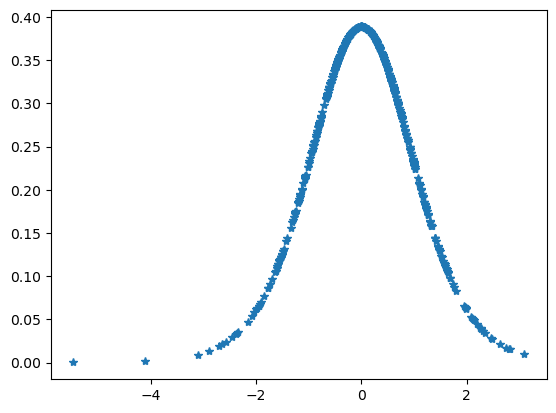

In [9]:
import matplotlib.pyplot as plt
from scipy.stats import t

# creating a dataset of 1000 with t-distribution of degree of freedom of 10

dataset_in_t = t.rvs(df=10, size=500)
y = t.pdf(dataset_in_t, df=10)

plt.plot(dataset_in_t, y, "*")
plt.show()


# code concept taken from: https://www.statology.org/t-distribution-python/

### Q10. Write a Python program to calculate the two-sample t-test for independent samples, given two random samples of equal size and a null hypothesis that the population means are equal.


In [13]:
'''
The below example used in the code:
In an examination, a sample of 8 girls average scored 97.25 with standard deviation of 3.65 and a sample of 12 boys average scored
87.25 with a standard deviation of 9.60. With 95% confidence Interval, test the null hypothesis that the population mean of girl
and boys score are equal. 

'''

'''

from above example:

<pre>

s1 = 3.65    s2 = 9.60
n1 = 8       n2 = 12
x1 = 97.25    x2 = 87.25

α = 0.05(significance level)  ---> confidence level = 1 - α = 0.95 --- 95%

α/2 = 0.005

* H<sub>0</sub>: μ1 = μ2  --> μ1 - μ2 = 0 (Null Hypothesis --> No difference between the avergae scores of girls and boys)
* H<sub>a</sub>: μ1 ≠ μ2  --> μ1 - μ2 ≠ 0 (Alternate Hypothesis --> There is a difference) --> Two tails test

</pre>

'''

import scipy.stats as st
import math

# s1, s2 --> standard deviations
# n1, n2 --> sample sizes
# x1, x2 --> sample means

s1 = 3.65   
s2 = 9.60
n1 = 8   
n2 = 12
x1 = 97.25   
x2 = 87.25
α = 0.05

d_f = n1+n2-2

def t_test_hypothesis(s1,s2,n1,n2,x1,x2,α,d_f):
    
    # Read "https://stackoverflow.com/questions/60699836/how-to-use-norm-ppf" to understand the below.

    # considering two-tail distribution as estimating population mean is a range between min and max, we will use α/2 in func
    critical_t_value = st.t.ppf(1-α/2, df=d_f)
    print("Critical t Value: ", critical_t_value)
    
    # when population standard deviattion are unknown, we take point estimate of sample standard deviation as population
    # standard deviation in the formula to calculate standard error(SE)
    
    mean_diff = x1 - x2
    mu_diff = 0 # as per null hypothesis, there is no difference in population mean 
    se1 = s1/math.sqrt(n1) # standard error for sample 1
    print("SE1: ", se1)
    se2 = s2/math.sqrt(n2) # standard error for sample 2
    print("SE2: ", se2)
    sed = math.sqrt(se1*2+se2*2) # standard error difference between two samples
    print("SED: ", sed)
    
    t_statistics = (mean_diff - mu_diff)/sed
    print("t Statistics: ", t_statistics)
    
    if t_statistics<0:
        if critical_t_value>t_statistics:
            print("We accept the Null Hypothesis that they is no difference between the average score of the population")
        else:
            print("We reject the Null Hypothesis that they is no difference between the average score of the population")
    else:
        if critical_t_value<t_statistics:
            print("We accept the Null Hypothesis that they is no difference between the average score of the population")
        else:
            print("We reject the Null Hypothesis that they is no difference between the average score of the population") 
    

t_test_hypothesis(s1,s2,n1,n2,x1,x2,α,d_f)


Critical t Value:  2.10092204024096
SE1:  1.2904698756654491
SE2:  2.7712812921102037
SED:  2.8501758429176447
t Statistics:  3.5085554545165474
We accept the Null Hypothesis that they is no difference between the average score of the population


### Q11: What is Student’s t distribution? When to use the t-Distribution.

<b><u>Definition</u></b>:
> The Student’s t-Test is a statistical hypothesis test for testing whether two samples are expected to have been drawn from the same population.
It is named for the pseudonym “Student” used by William Gosset, who developed the test.

<b><u>Process</u></b>:
The test works by checking the means from two samples to see if they are significantly different from each other. It does this by calculating the standard error in the difference between means, which can be interpreted to see how likely the difference is, if the two samples have the same mean (the null hypothesis).
The t statistic calculated by the test can be interpreted by comparing it to critical values from the t-distribution. The critical value can be calculated using the degrees of freedom and a significance level with the percent point function (PPF).

<b><u>When to use a t test</u></b>:
* A t test can only be used when comparing the means of two groups (a.k.a. pairwise comparison). If you want to compare more than two groups, or if you want to do multiple pairwise comparisons, use an ANOVA test or a post-hoc test.
* When the size of the samples are less than 30.

### Q12: What is t-statistic? State the formula for t-statistic.

A test statistic is a number calculated from a statistical test of a hypothesis. "t-statistics" is a type of test statistis which is calculated from student's t-test. 
The T Statistic is used in a T test when you are deciding if you should support or reject the null hypothesis. It’s very similar to a Z-score and you use it in the same way: find a cut off point, find your t score, and compare the two. You use the t statistic when you have a small sample size, or if you don’t know the population standard deviation. 


<b><u>Formula</u></b>:

t = observed difference between sample means / standard error of the difference between the means
or,
${t = (mean(X1) - mean(X2)) / sed}$

* Where ${X1}$ and ${X2}$ are the first and second data samples and ${sed}$ is the standard error of the difference between the means.

The standard error of the difference between the means can be calculated as follows: ${sed = sqrt(se1^2 + se2^2)}$

* Where ${se1}$ and ${se2}$ are the standard errors for the first and second datasets.

The standard error of a sample can be calculated as: ${se = std / sqrt(n)}$

* Where ${se}$ is the standard error of the sample, ${std}$ is the sample standard deviation, and n is the number of observations in the sample.

### Q13. A coffee shop owner wants to estimate the average daily revenue for their shop. They take a random sample of 50 days and find the sample mean revenue to be 500 dollar with a standard deviation of $50. Estimate the population mean revenue with a 95% confidence interval.




In [1]:
# Sample size is 50 days, which is > 30 ----> we can use the z-test
# Given Confidence Interval or level -> 95%
# we are going to take point estimate of population standard deviation as sample standard deviation while calculating 
# the standard error(SE) as population standard deviation is not known. 

import scipy.stats as st
import math

# below four values are given in the question

sample_size = 50
sample_mean = 500
sample_standard_deviation = 50
CL = 0.95  #CL --> Confidence Level

def calculate_population_mean(sample_mean, sample_standard_deviation, sample_size, CL):
    
    # Read "https://stackoverflow.com/questions/60699836/how-to-use-norm-ppf" to understand the below.

    alpha = 1 - CL
    half_alpha = alpha/2  # considering two-tail distribution
    z_score = st.norm.ppf(1-half_alpha)
    
    # when population standard deviattion are unknown, we take point estimate of sample standard deviation as population
    # standard deviation in the formula to calculate standard error(SE)
    
    standard_error = sample_standard_deviation/math.sqrt(sample_size)
    print("Standard Error:", standard_error)
    population_mean_min = sample_mean - (z_score*standard_error)
    population_mean_max = sample_mean + (z_score*standard_error)
    print("Population mean will fall under {} to {} with confidence level of {}%".format(population_mean_min, population_mean_max, CL*100))


calculate_population_mean(sample_mean, sample_standard_deviation, sample_size, CL)


# to understand calculation concept, visit: http://www.southampton.ac.uk/~cpd/mean2.html

Standard Error: 7.071067811865475
Population mean will fall under 486.1409617565032 to 513.8590382434968 with confidence level of 95.0%


### Q14. A researcher hypothesizes that a new drug will decrease blood pressure by 10 mmHg. They conduct a clinical trial with 100 patients and find that the sample mean decrease in blood pressure is 8 mmHg with a standard deviation of 3 mmHg. Test the hypothesis with a significance level of 0.05.


* H<sub>0</sub>: μ = 10 mmHg
* H<sub>a</sub>: μ ≠ 10 mmHg

* what type of test needed to be conducted?
  As, alternate hypothesis is μ ≠ 10 mmHg, so μ can be more than or less than 80. So, in this case we will have to conduct two tail test.


* Ideally, in a normal distribution, with confidence level 95%, critical values(z value in this case) will be 1.96 & -1.96. These values separate the "Reject the Null Hypothesis Region" from "Failed to Reject Null Hypothesis Region".
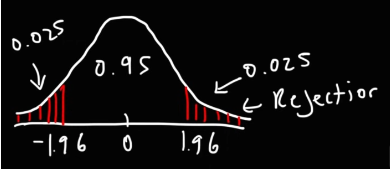

* Now, in order to determine whether to accpet or reject Null Hypothesis, we need to calculate the z vlaue from the given statistics in the question and comapre it to the criticcal z value.

* sample mean = 8
  sample standard deviation = 3
  sample size = 100 (as it is >30, so this case, we can use normal distribution. If it is <30, then we will have to use Student's t distribution)

* z value = (sample mean - population mean)/(sample standard deviation/sqrt(sample size))
        = (8-10)/(3/sqrt(100)) = -2/(3/10) = -2/0.3 = 6.66
        
*  Now the calculated z score is 6.66 which is way bigger than +1.96(critical z value). So, it falls under the rejected area on the right side. So, in this case, we should reject the Null Hypothesis.

<b><u>Conclusion</u></b>:
> At 95% of Confidencel Level, we can not accept the Null Hypothesis that that a new drug will decrease blood pressure by 10 mmHg

Note: Above concept understood from: https://www.youtube.com/watch?app=desktop&v=zJ8e_wAWUzE

### Q15. An electronics company produces a certain type of product with a mean weight of 5 pounds and a standard deviation of 0.5 pounds. A random sample of 25 products is taken, and the sample mean weight is found to be 4.8 pounds. Test the hypothesis that the true mean weight of the products is less than 5 pounds with a significance level of 0.01.

* H<sub>0</sub>: μ < 5 pounds
* H<sub>a</sub>: μ >= 5 pounds

* <b>what type of test needed to be conducted?</b> As, alternate hypothesis is μ >= 5 pounds, so μ can be more than or equals to 5. So, in this case we will have to conduct one tail test, specifically right sided one tail test. And, sample size is 25 which is less than 30, so we want to use t test.

* Population mean(hypothically), μ = 5 pounds,
  Population standard deviation = 0.5,
  Sample size = 25,
  Sample mean = 4.8
  
* As we are going to use t test, then df(degree of freedom) = sample size - 1 = 25 -1 = 24

* df = 24 and significance level(α) = 0.01. Now we have to find the critical t value using df and α. As per the t table, critical t value is = +2.49.

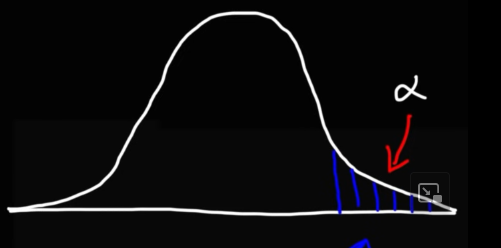


* Now, in order to determine whether to accpet or reject Null Hypothesis, we need to calculate the z vlaue from the given statistics in the question and comapre it to the criticcal z value.


* t value = (sample mean - hypothesis population mean)/(population standard deviation/sqrt(sample size))
        = (5-4.8)/(0.5/sqrt(25)) = 0.2/(0.5/5) = 0.2/0.1 = 2
        
* As, 2 < 2.49  --> calculated t value < critical t value --> calculated t value is falling under the accepted area --> so, in this case, we failed to reject Null Hypothesis.

<b><u>Conclusion</u></b>:
> At significance level of 0.01, we accept the hypothesis the true mean weight of the products is less than 5 pounds

### Q16. Two groups of students are given different study materials to prepare for a test. The first group (n1 = 30) has a mean score of 80 with a standard deviation of 10, and the second group (n2 = 40) has a mean score of 75 with a standard deviation of 8. Test the hypothesis that the population means for the two groups are equal with a significance level of 0.01.

<pre>

s1 = 10   s2 = 8
n1 = 30   n2 = 40
x1 = 80   x2 = 75

α = 0.01(significance level)  ---> confidence level = 1 - α = 0.99 --- 99%

α/2 = 0.005

* H<sub>0</sub>: μ1 = μ2  --> μ1 - μ2 = 0 (Null Hypothesis)
* H<sub>a</sub>: μ1 ≠ μ2  --> μ1 - μ2 ≠ 0 (Alternate Hypothesis)

</pre>


* As both of the sample size are >30  ---> we wanted to use two sample z test on normal distribution. We wil use two sample z value here to test the hypothesis. 

* Critical z value for 0.01 significance level in two tailed normal distribution: -2.575, +2.575 

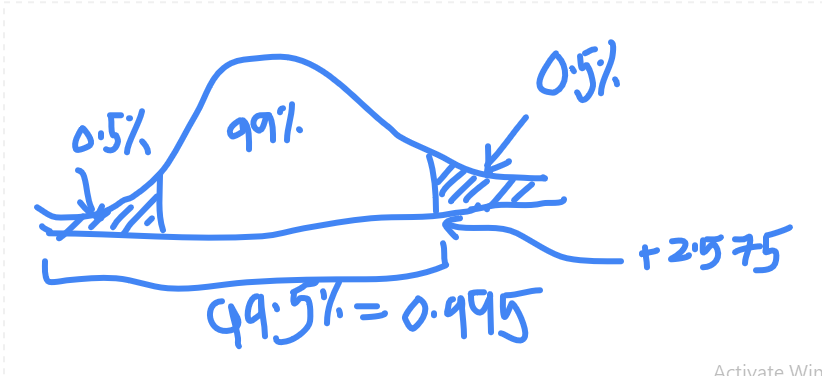

* Critical z value calculated from Omni calculator website:

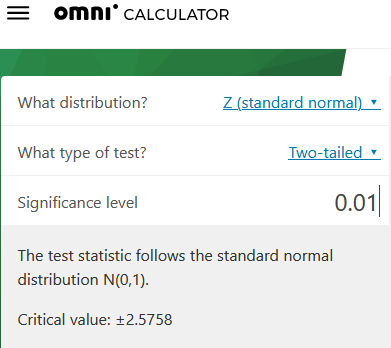

* Z statistics formula for two sample test:

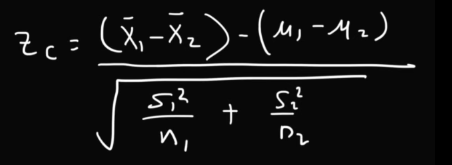

* Now let's put the values to calculate it:

<b>z statistics</b> = {(80-75)-0}/sqrt{(10*10/30)+(8*8/40) = 5/sqrt(3.33+1.6) = 5/sqrt(4.93) = +2.22

* +2.22 < +2.575 ---> z statistic < z critical value --> the z statistic is falling under the accpted area in the curve. So we fail to reject the Null Hypothesis.

<b><u>Conclusion</u></b>:
> At significance level of 0.01, we fail to reject the the hypothesis that the population means for the two groups are equal. 

### Q17. A marketing company wants to estimate the average number of ads watched by viewers during a TV program. They take a random sample of 50 viewers and find that the sample mean is 4 with a standard deviation of 1.5. Estimate the population mean with a 99% confidence interval.

In [2]:
# Sample size is 50 viewers, which is > 30 ----> we can use the z-test
# Given Confidence Interval or level -> 99%
# We are going to take point estimate of population standard deviation as sample standard deviation while calculating 
# the standard error(SE) as population standard deviation is not known. 

import scipy.stats as st
import math

# below four values are given in the question

sample_size = 50
sample_mean = 4
sample_standard_deviation = 1.5
CL = 0.99  #CL --> Confidence Level

def calculate_population_mean(sample_mean, sample_standard_deviation, sample_size, CL):
    
    # Read "https://stackoverflow.com/questions/60699836/how-to-use-norm-ppf" to understand the below.

    alpha = 1 - CL
    half_alpha = alpha/2  # considering two-tail distribution as estimating population mean is a range between min and max.
    z_score = st.norm.ppf(1-half_alpha)
    print("z statistics: ", z_score)
    
    # when population standard deviattion are unknown, we take point estimate of sample standard deviation as population
    # standard deviation in the formula to calculate standard error(SE)
    
    standard_error = sample_standard_deviation/math.sqrt(sample_size)
    print("Standard Error:", standard_error)
    population_mean_min = sample_mean - (z_score*standard_error)
    population_mean_max = sample_mean + (z_score*standard_error)
    print("Population mean will fall under {} to {} with confidence level of {}%".format(population_mean_min, population_mean_max, CL*100))


calculate_population_mean(sample_mean, sample_standard_deviation, sample_size, CL)


# to understand calculation concept, visit: http://www.southampton.ac.uk/~cpd/mean2.html

z statistics:  2.5758293035489004
Standard Error: 0.21213203435596426
Population mean will fall under 3.4535840896844654 to 4.546415910315535 with confidence level of 99.0%
